In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [7]:
# NN with torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
#from torch.summary import summary
from torch.utils.data import Dataset, DataLoader, TensorDataset


In [9]:
# Importing data into a pandas df
df = pd.read_csv('data_text_04.csv', skiprows=[1], sep=';')
# View data
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,...,text_desaturation,text_cpr,text_itch,text_copy,text_problem,text_arrest,text_confus,text_diplopia,text_tachycardia,text_decreased
0,1,1,56,12,3,2,right forearm burn,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,2,1,68,8,2,2,arm pain. Lt,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2,1,2,71,8,1,1,ascites tapping,1,1,3,...,0,0,0,0,0,0,0,0,0,0
3,1,2,58,4,3,1,distension. abd,1,1,3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,54,6,4,1,fever,1,1,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
for col in df.columns:
    print(col)

Group
Sex
Age
Patients number per hour
Arrival mode
Injury
Chief_complain
Mental
Pain
NRS_pain
SBP
DBP
HR
RR
BT
Saturation
KTAS_RN
Diagnosis in ED
Disposition
KTAS_expert
Error_group
Length of stay_min
KTAS duration_min
mistriage
Arrival mode 2
Arrival mode 3
Arrival mode 4
Arrival mode 5
Arrival mode 6
Arrival mode 7
Disposition 2
Disposition 3
Disposition 4
Disposition 5
Disposition 6
Disposition 7
text_ocular
text_eyelid
text_arm
text_abd
text_chest
text_back
text_eye
text_gastric
text_head
text_~?
text_gingival
text_chin
text_finger
text_skin
text_motor
text_hip
text_face
text_throat
text_neck
text_leg
text_ruq
text_facial
text_mental
text_knee
text_lip
text_wrist
text_tooth
text_cheek
text_elbow
text_flank
text_llq
text_rlq
text_general
text_limb
text_erection
text_jaw
text_hand
text_scalp
text_vaginal
text_ankle
text_thorax
text_anal
text_eyebrow
text_periumbilical
text_thigh
text_mandibular
text_toe
text_ear
text_foot
text_side
text_shoulder
text_femur
text_visual
text_scrotal
t

In [11]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]
df = df[df.columns.drop(['Chief_complain', 'KTAS_RN', 'Diagnosis in ED','Length of stay_min', 'KTAS duration_min', 'mistriage', 'Arrival mode'])]

In [12]:
df

,Group,Sex,Age,Patients number per hour,Injury,Mental,Pain,NRS_pain,SBP,DBP,...,text_desaturation,text_cpr,text_itch,text_copy,text_problem,text_arrest,text_confus,text_diplopia,text_tachycardia,text_decreased
0,1,1,56,12,2,1,1,2,137,75,...,0,0,0,0,0,0,0,0,0,0
1,2,1,68,8,2,1,1,2,130,80,...,0,0,0,0,0,0,0,0,0,0
2,1,2,71,8,1,1,1,3,139,94,...,0,0,0,0,0,0,0,0,0,0
3,1,2,58,4,1,1,1,3,91,67,...,0,0,0,0,0,0,0,0,0,0
4,2,1,54,6,1,1,1,3,140,90,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,2,2,79,5,1,1,0,#BOÞ!,120,80,...,0,0,0,0,0,0,0,0,0,0
1262,2,2,81,2,1,1,0,#BOÞ!,120,80,...,0,0,0,0,0,0,0,0,0,0
1263,2,2,81,17,1,1,0,#BOÞ!,130,90,...,0,0,0,0,0,0,0,0,0,0
1264,2,1,81,2,2,1,0,#BOÞ!,170,100,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#df['Chief_complain'] = df.Chief_complain.str.replace(r'(^.*\?.*$)', 'nullval')
#df = df.replace('nullval', np.nan)
df = df.replace('??', np.nan)

In [14]:
df = df.dropna(axis=1, how='all')
# View if columns contain null values
df.isna().sum()

Group                       0
Sex                         0
Age                         0
Patients number per hour    0
Injury                      0
                           ..
text_arrest                 0
text_confus                 0
text_diplopia               0
text_tachycardia            0
text_decreased              0
Length: 183, dtype: int64

In [15]:
# Replace values in NRS pain by 0, 
# because they correspond to 0 in the pain column
df['NRS_pain'] = df['NRS_pain'].replace('#BOÞ!', 0)

In [16]:
df

,Group,Sex,Age,Patients number per hour,Injury,Mental,Pain,NRS_pain,SBP,DBP,...,text_desaturation,text_cpr,text_itch,text_copy,text_problem,text_arrest,text_confus,text_diplopia,text_tachycardia,text_decreased
0,1,1,56,12,2,1,1,2,137,75,...,0,0,0,0,0,0,0,0,0,0
1,2,1,68,8,2,1,1,2,130,80,...,0,0,0,0,0,0,0,0,0,0
2,1,2,71,8,1,1,1,3,139,94,...,0,0,0,0,0,0,0,0,0,0
3,1,2,58,4,1,1,1,3,91,67,...,0,0,0,0,0,0,0,0,0,0
4,2,1,54,6,1,1,1,3,140,90,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,2,2,79,5,1,1,0,0,120,80,...,0,0,0,0,0,0,0,0,0,0
1262,2,2,81,2,1,1,0,0,120,80,...,0,0,0,0,0,0,0,0,0,0
1263,2,2,81,17,1,1,0,0,130,90,...,0,0,0,0,0,0,0,0,0,0
1264,2,1,81,2,2,1,0,0,170,100,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#print(df.isna().sum())
# Saturation replacement with median 
#df['Saturation'] = df['Saturation'].replace(np.nan, df['Saturation'].median())
df['Saturation'] = df['Saturation'].replace(np.nan, 100)
# Use Hot Deck Imputation to fill up rest of data
df.fillna(method='ffill', inplace=True)

In [18]:
torch_tensor = torch.tensor(df['KTAS_expert'])
print(torch_tensor)

tensor([5, 5, 5,  ..., 3, 3, 3])


In [19]:
df = df.apply(pd.to_numeric)
y = df['KTAS_expert']
X = df.drop(['KTAS_expert'], axis=1)

In [20]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.1, random_state=22)


In [21]:
X_trainval.describe().T

,count,mean,std,min,25%,50%,75%,max
Group,1012.0,1.464427,0.498980,1.0,1.0,1.0,2.0,2.0
Sex,1012.0,1.520751,0.499816,1.0,1.0,2.0,2.0,2.0
Age,1012.0,54.220356,19.565454,16.0,37.0,57.0,71.0,95.0
Patients number per hour,1012.0,7.512846,3.180497,1.0,5.0,7.0,10.0,17.0
Injury,1012.0,1.199605,0.399901,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
text_arrest,1012.0,0.000988,0.031435,0.0,0.0,0.0,0.0,1.0
text_confus,1012.0,0.004941,0.070151,0.0,0.0,0.0,0.0,1.0
text_diplopia,1012.0,0.000988,0.031435,0.0,0.0,0.0,0.0,1.0
text_tachycardia,1012.0,0.000988,0.031435,0.0,0.0,0.0,0.0,1.0


In [22]:
# Normalisation of data with min_max
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train) - 1
X_val, y_val = np.array(X_val), np.array(y_val) - 1
X_test, y_test = np.array(X_test), np.array(y_test) - 1

In [23]:
class Net(nn.Module):
    def __init__(self,
                 num_feature: int = 176,
                 num_class: int = 5) -> None:
        super(Net, self).__init__()

        self.fc1 = nn.Linear(num_feature, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(64)

    def forward(self, x) -> torch.Tensor:
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_out(x)

        return x


In [ ]:
#Get parameters for layers 
#summary(Net(), (176, ))

In [24]:
# Select device 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'working on {device}')


working on cpu


In [37]:
model = Net(num_feature=X_train.shape[1], num_class=len(set(y_train)))
# model
X_train.shape[1]
# len(set(y_train))

182

In [26]:
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [27]:
def compute_accuracy(y_pred,
                     y_test):

    y_pred_softmax = torch.log_softmax(y_pred, dim=1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim=1)

    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)

    acc = torch.round(acc * 100)

    return acc


In [28]:
class ClassifierDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__(self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(
    X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(
    X_val).float(), torch.from_numpy(y_val).long())


In [39]:
print("Starting Training...")

epochs = 50
batch_size = 32

accuracy = {
    'train': [],
    'val': []
}
loss = {
    'train': [],
    'val': []
}

train_loader = DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(
    val_dataset, batch_size=batch_size, shuffle=True, drop_last=False)
# TRAINING

model.train()

lr_timestep = [0, 5, 3000, 9999]
lr_ = [0.0001, 0.000001, 1e-7]
lr_counter = 0

for epoch in range(0, epochs):
    train_epoch_loss = 0
    train_epoch_acc = 0
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(
            device), y_train_batch.to(device)
        
        if epoch == lr_timestep[lr_counter]:
            optimizer = torch.optim.Adam(model.parameters(), lr=lr_[lr_counter])
            lr_counter += 1
        optimizer.zero_grad()
 
        y_train_pred = model(X_train_batch)
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = compute_accuracy(y_train_pred, y_train_batch)

        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()

    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0
        val_epoch_acc = 0

        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(
                device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = compute_accuracy(y_val_pred, y_val_batch)

            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()

    loss['train'].append(train_epoch_loss/len(train_loader))
    loss['val'].append(val_epoch_loss/len(val_loader))
    accuracy['train'].append(train_epoch_acc/len(train_loader))
    accuracy['val'].append(val_epoch_acc/len(val_loader))

    print(f'Epoch {epoch+1+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Starting Training...
Epoch 001: | Train Loss: 1.18486 | Val Loss: 1.30417 | Train Acc: 59.143| Val Acc: 52.250
Epoch 002: | Train Loss: 0.95216 | Val Loss: 1.04258 | Train Acc: 67.714| Val Acc: 58.750
Epoch 003: | Train Loss: 0.77200 | Val Loss: 1.01148 | Train Acc: 68.500| Val Acc: 60.000
Epoch 004: | Train Loss: 0.67855 | Val Loss: 0.94416 | Train Acc: 75.536| Val Acc: 65.250
Epoch 005: | Train Loss: 0.62309 | Val Loss: 1.02972 | Train Acc: 77.929| Val Acc: 63.750
Epoch 006: | Train Loss: 0.56345 | Val Loss: 0.98861 | Train Acc: 82.036| Val Acc: 60.000
Epoch 007: | Train Loss: 0.56480 | Val Loss: 1.02172 | Train Acc: 81.821| Val Acc: 63.500
Epoch 008: | Train Loss: 0.56257 | Val Loss: 0.99844 | Train Acc: 81.893| Val Acc: 60.000
Epoch 009: | Train Loss: 0.56263 | Val Loss: 0.92047 | Train Acc: 82.036| Val Acc: 61.000
Epoch 010: | Train Loss: 0.56271 | Val Loss: 0.92005 | Train Acc: 81.821| Val Acc: 64.500
Epoch 011: | Train Loss: 0.55868 | Val Loss: 1.01394 | Train Acc: 81.964| Val A

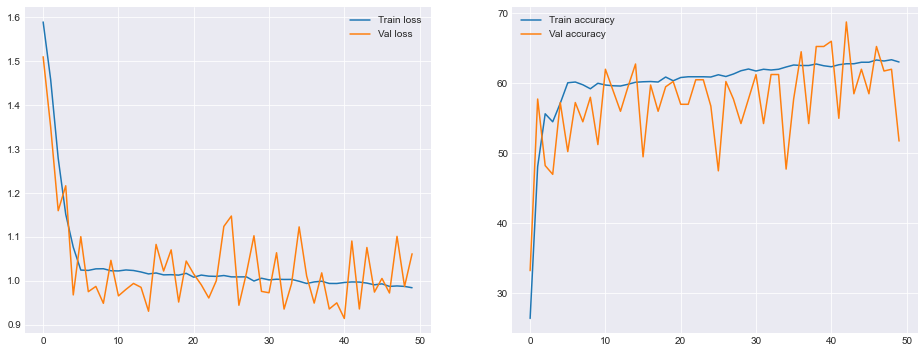

In [30]:
plt.style.use('seaborn-darkgrid')
fig, axs = plt.subplots(ncols=2, figsize=(16, 6))
axs[0].plot(loss['train'], label='Train loss')
axs[0].plot(loss['val'], label='Val loss')
axs[0].legend()
axs[1].plot(accuracy['train'], label='Train accuracy')
axs[1].plot(accuracy['val'], label='Val accuracy')
axs[1].legend()
plt.show()